In [1]:
import random
import math
import matplotlib.pyplot as plt
import pandas as pd

## 4.6 独立 MH 法

In [2]:
class IdependentMH:
    def __init__(self,
                 start,
                 proposal_generator,
                 proposal_distribution,
                 target_distribution):
        self.theta = start
        self.generator = proposal_generator
        self.q = proposal_distribution
        self.f = target_distribution
        
        self.accepted = 0
        self.n = 0

    def __next__(self):
        a = self.generator()
        r = self.q(self.theta) * self.f(a) / (self.q(a) * self.f(self.theta))
        if random.random() < r:
            self.theta = a
            self.accepted += 1
        self.n += 1
        return self.theta

In [3]:
def experiment(alg, T, B):
    data = []
    for _ in range(T):
        data.append(alg.__next__())
    print(f"受容率: {alg.accepted}/{alg.n} = {alg.accepted / alg.n}")
    plt.hist(data[B:], bins=int(math.log(100000)*2))
    plt.show()
    plt.plot(data[:B])
    plt.show()
    plt.plot(data[B:])
    plt.show()
    return data[B:]

### 4.6.1 波平釣果問題

受容率: 41268/100000 = 0.41268


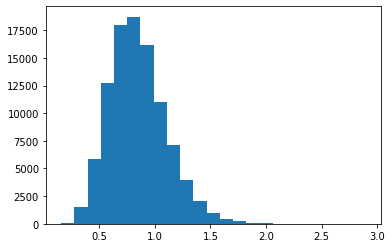

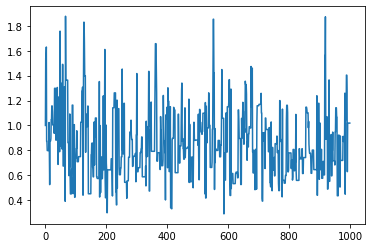

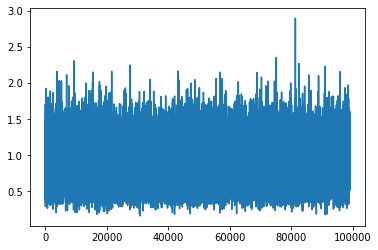

In [4]:
alg = IdependentMH(1,
                   lambda: random.gauss(1, math.sqrt(0.5)),
                   lambda x: math.exp(-(x-1)**2),
                   lambda x: math.exp(-13*x) * x**10 if x > 0 else 0)

_ = experiment(alg, 100000, 1000)

### 4.6.2 正選手問題

受容率: 3831/10000 = 0.3831


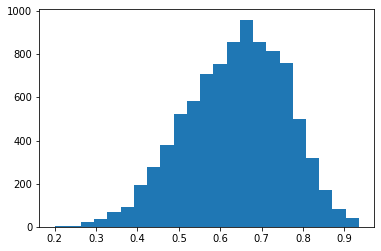

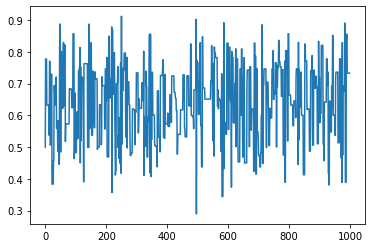

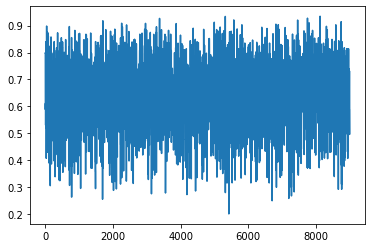

In [5]:
alg = IdependentMH(0.5,
                   lambda: random.random(),
                   lambda x: 1,
                   lambda x: x**9.2 * (1-x)**4.8)

_ = experiment(alg, 10000, 1000)

## 4.7 ランダムウォーク MH 法

In [6]:
class RandomWalkMH:
    def __init__(self,
                 start,
                 generator,
                 target_distribution):
        self.theta = start
        self.generator = generator
        self.f = target_distribution
        
        self.accepted = 0
        self.n = 0

    def __next__(self):
        a = self.theta + self.generator()
        r = self.f(a) / self.f(self.theta)
        if random.random() < r:
            self.theta = a
            self.accepted += 1
        self.n += 1
        return self.theta

受容率: 63620/100000 = 0.6362


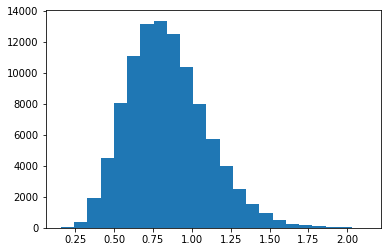

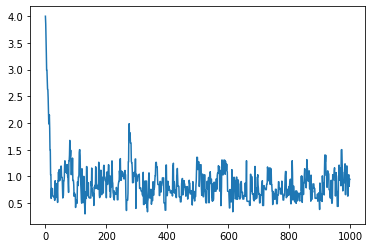

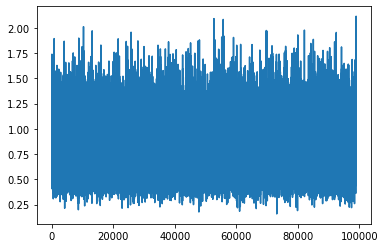

In [7]:
alg = RandomWalkMH(4,
                   lambda: random.gauss(0, math.sqrt(0.1)),
                   lambda x: math.exp(-13*x) * x**10 if x > 0 else 0)

_ = experiment(alg, 100000, 1000)

### 4.8.1 標準偏差・歪度・尖度の推定
### 4.8.2 事後予測分布の評価

受容率: 63658/100000 = 0.63658


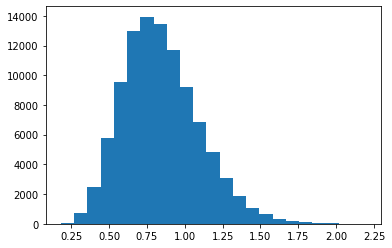

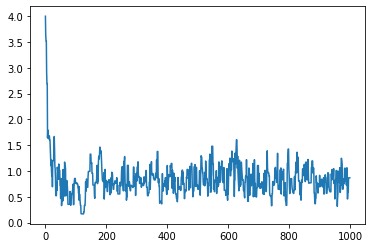

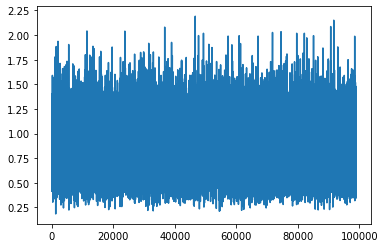

In [8]:
alg = RandomWalkMH(4,
                   lambda: random.gauss(0, math.sqrt(0.1)),
                   lambda x: math.exp(-13*x) * x**10 if x > 0 else 0)

data = experiment(alg, 100000, 1000)

In [9]:
sd = list(map(math.sqrt, data))
skewness = list(map(lambda x: 1/math.sqrt(x), data))
kurtosis = list(map(lambda x: 3 + 1/math.sqrt(x), data))
dinner = list(map(lambda x: math.exp(-x), data))
print(sum(sd) / len(sd))
print(sum(skewness) / len(skewness))
print(sum(kurtosis) / len(kurtosis))
print(sum(dinner) / len(dinner))

0.9088559090287643
1.126488896474963
4.1264888964749575
0.4429847265573998


In [10]:
df = pd.DataFrame([sd, skewness, kurtosis, dinner],
                  index=["sd", "歪度", "尖度", "夕食"])
df.T.describe(percentiles=[0.05, 0.95]).T

,count,mean,std,min,5%,50%,95%,max
sd,99000.0,0.908856,0.137097,0.427717,0.690365,0.904832,1.139921,1.480382
歪度,99000.0,1.126489,0.177973,0.675501,0.877254,1.105177,1.448509,2.337993
尖度,99000.0,4.126489,0.177973,3.675501,3.877254,4.105177,4.448509,5.337993
夕食,99000.0,0.442985,0.105962,0.111746,0.272690,0.440995,0.620888,0.832816
